In [1]:
import pystatsbomb as sb
import pandas as pd

In [2]:
c = sb.Client()

In [3]:
c.get_competitions()

In [4]:
c.competitions

[{'competition_id': 37,
  'competition_name': "FA Women's Super League",
  'country_name': 'England',
  'match_available': '2018-05-25T15:15:55.903434',
  'match_updated': '2018-05-25T15:15:55.903434',
  'season_id': 1,
  'season_name': '2017/2018'},
 {'competition_id': 49,
  'competition_name': 'NWSL',
  'country_name': 'United States of America',
  'match_available': '2018-06-11T15:34:54.124942',
  'match_updated': '2018-06-11T15:34:54.124942',
  'season_id': 3,
  'season_name': '2018'}]

In [5]:
c.get_matches()

In [6]:
c.matches[1]

{'away_score': 1,
 'away_team': {'away_team_id': 761, 'away_team_name': 'Chicago Red Stars'},
 'competition': {'competition_id': 49,
  'competition_name': 'NWSL',
  'country_name': 'United States of America'},
 'data_version': '1.0.2',
 'home_score': 1,
 'home_team': {'home_team_id': 766,
  'home_team_name': 'North Carolina Courage'},
 'kick_off': None,
 'last_updated': '2018-06-11T15:34:54.124942',
 'match_date': '2018-05-06',
 'match_id': 7444,
 'match_status': 'available',
 'referee_name': 'M. Vega',
 'season': {'season_id': 3, 'season_name': '2018'},
 'stadium_name': "Sahlen's Stadium at WakeMed Soccer Park"}

In [9]:
c.get_lineups(match_id=7298)

In [11]:
c.lineups[1]

{'lineup': [{'country': {'id': 220, 'name': 'Sweden'},
   'jersey_number': 15,
   'player_id': 4635,
   'player_name': 'Julia Spetsmark'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 26,
   'player_id': 4637,
   'player_name': 'Ellie Roebuck'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 12,
   'player_id': 4643,
   'player_name': 'Georgia Stanway'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 8,
   'player_id': 4644,
   'player_name': 'Jill Scott'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 11,
   'player_id': 4645,
   'player_name': 'Isobel Christiansen'},
  {'country': {'id': 201, 'name': 'Scotland'},
   'jersey_number': 22,
   'player_id': 4646,
   'player_name': 'Claire Emslie'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 23,
   'player_id': 4648,
   'player_name': 'Abbie McManus'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 14,
   'player_id': 4649,
  

In [22]:
c.get_events()

https://raw.githubusercontent.com/statsbomb/open-data/master/data/events


In [23]:
events = c.events

In [24]:
len(events)

2960

# To Pandas DataFrames

In [184]:
def getMatchDictChildren(d):
    
    dict_children = {}
    for k,v in d.items():
        if isinstance(v, dict):
            for k, v in v.items():
                dict_children[k] = v
        else:
            dict_children[k] = v
    return dict_children

def getLineupParse(l):
    
    lineup = []
    team_name = l.get('team_name', None)
    team_id = l.get('team_id', None)
    players = l.get('lineup', 'Structure has changed')
    
    if isinstance(players, list):
        for p in players:
            name = p.get('player_name', None)
            pid = p.get('player_id', None)
            jersey = p.get('jersey_number', None)
            country_id = p.get('country', {'id':None}).get('id', None)
            country_name = p.get('country', {'name':None}).get('name', None)
            
            lineup.append({
                "team_name": team_name,
                "team_id": team_id,
                "player_name": name,
                "player_id": pid,
                "jersey_number": jersey,
                "country_id": country_id,
                "country_name": country_name})

            
    else:
        print(players)
    print(lineup)
    return lineup

In [185]:
df_competitions = pd.DataFrame(c.competitions)

In [186]:
df_matches = pd.DataFrame([getMatchDictChildren(match) for match in c.matches])

In [187]:
df_lineups = pd.DataFrame([getLineupParse(l) for l in c.lineups])

[{'team_name': 'Chelsea LFC', 'team_id': 745, 'player_name': 'Magdalena Ericsson', 'player_id': 4633, 'jersey_number': 16, 'country_id': 220, 'country_name': 'Sweden'}, {'team_name': 'Chelsea LFC', 'team_id': 745, 'player_name': 'Crystal Dunn', 'player_id': 4634, 'jersey_number': 19, 'country_id': 241, 'country_name': 'United States of America'}, {'team_name': 'Chelsea LFC', 'team_id': 745, 'player_name': 'Maria Thorisdottir', 'player_id': 4636, 'jersey_number': 2, 'country_id': 171, 'country_name': 'Norway'}, {'team_name': 'Chelsea LFC', 'team_id': 745, 'player_name': 'Drew Spence', 'player_id': 4638, 'jersey_number': 24, 'country_id': 68, 'country_name': 'England'}, {'team_name': 'Chelsea LFC', 'team_id': 745, 'player_name': 'Maren Mjelde', 'player_id': 4639, 'jersey_number': 18, 'country_id': 171, 'country_name': 'Norway'}, {'team_name': 'Chelsea LFC', 'team_id': 745, 'player_name': 'Rut Hedvig Lindahl', 'player_id': 4640, 'jersey_number': 1, 'country_id': 220, 'country_name': 'Swed

In [188]:
df_lineups

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,"{'team_name': 'Chelsea LFC', 'team_id': 745, '...","{'team_name': 'Chelsea LFC', 'team_id': 745, '...","{'team_name': 'Chelsea LFC', 'team_id': 745, '...","{'team_name': 'Chelsea LFC', 'team_id': 745, '...","{'team_name': 'Chelsea LFC', 'team_id': 745, '...","{'team_name': 'Chelsea LFC', 'team_id': 745, '...","{'team_name': 'Chelsea LFC', 'team_id': 745, '...","{'team_name': 'Chelsea LFC', 'team_id': 745, '...","{'team_name': 'Chelsea LFC', 'team_id': 745, '...","{'team_name': 'Chelsea LFC', 'team_id': 745, '...","{'team_name': 'Chelsea LFC', 'team_id': 745, '...","{'team_name': 'Chelsea LFC', 'team_id': 745, '...","{'team_name': 'Chelsea LFC', 'team_id': 745, '...","{'team_name': 'Chelsea LFC', 'team_id': 745, '..."
1,"{'team_name': 'Manchester City WFC', 'team_id'...","{'team_name': 'Manchester City WFC', 'team_id'...","{'team_name': 'Manchester City WFC', 'team_id'...","{'team_name': 'Manchester City WFC', 'team_id'...","{'team_name': 'Manchester City WFC', 'team_id'...","{'team_name': 'Manchester City WFC', 'team_id'...","{'team_name': 'Manchester City WFC', 'team_id'...","{'team_name': 'Manchester City WFC', 'team_id'...","{'team_name': 'Manchester City WFC', 'team_id'...","{'team_name': 'Manchester City WFC', 'team_id'...","{'team_name': 'Manchester City WFC', 'team_id'...","{'team_name': 'Manchester City WFC', 'team_id'...","{'team_name': 'Manchester City WFC', 'team_id'...","{'team_name': 'Manchester City WFC', 'team_id'..."
2,"{'team_name': 'North Carolina Courage', 'team_...","{'team_name': 'North Carolina Courage', 'team_...","{'team_name': 'North Carolina Courage', 'team_...","{'team_name': 'North Carolina Courage', 'team_...","{'team_name': 'North Carolina Courage', 'team_...","{'team_name': 'North Carolina Courage', 'team_...","{'team_name': 'North Carolina Courage', 'team_...","{'team_name': 'North Carolina Courage', 'team_...","{'team_name': 'North Carolina Courage', 'team_...","{'team_name': 'North Carolina Courage', 'team_...","{'team_name': 'North Carolina Courage', 'team_...","{'team_name': 'North Carolina Courage', 'team_...","{'team_name': 'North Carolina Courage', 'team_...","{'team_name': 'North Carolina Courage', 'team_..."
3,"{'team_name': 'Chicago Red Stars', 'team_id': ...","{'team_name': 'Chicago Red Stars', 'team_id': ...","{'team_name': 'Chicago Red Stars', 'team_id': ...","{'team_name': 'Chicago Red Stars', 'team_id': ...","{'team_name': 'Chicago Red Stars', 'team_id': ...","{'team_name': 'Chicago Red Stars', 'team_id': ...","{'team_name': 'Chicago Red Stars', 'team_id': ...","{'team_name': 'Chicago Red Stars', 'team_id': ...","{'team_name': 'Chicago Red Stars', 'team_id': ...","{'team_name': 'Chicago Red Stars', 'team_id': ...","{'team_name': 'Chicago Red Stars', 'team_id': ...","{'team_name': 'Chicago Red Stars', 'team_id': ...","{'team_name': 'Chicago Red Stars', 'team_id': ...","{'team_name': 'Chicago Red Stars', 'team_id': ..."
4,"{'team_name': 'Seattle Reign FC', 'team_id': 7...","{'team_name': 'Seattle Reign FC', 'team_id': 7...","{'team_name': 'Seattle Reign FC', 'team_id': 7...","{'team_name': 'Seattle Reign FC', 'team_id': 7...","{'team_name': 'Seattle Reign FC', 'team_id': 7...","{'team_name': 'Seattle Reign FC', 'team_id': 7...","{'team_name': 'Seattle Reign FC', 'team_id': 7...","{'team_name': 'Seattle Reign FC', 'team_id': 7...","{'team_name': 'Seattle Reign FC', 'team_id': 7...","{'team_name': 'Seattle Reign FC', 'team_id': 7...","{'team_name': 'Seattle Reign FC', 'team_id': 7...","{'team_name': 'Seattle Reign FC', 'team_id': 7...","{'team_name': 'Seattle Reign FC', 'team_id': 7...","{'team_name': 'Seattle Reign FC', 'team_id': 7..."
5,"{'team_name': 'Portland Thorns FC', 'team_id':...","{'team_name': 'Portland Thorns FC', 'team_id':...","{'team_name': 'Portland Thorns FC', 'team_id':...","{'team_name': 'Portland Thorns FC', 'team_id':...","{'team_name': 'Portland Thorns FC', 'team_id':...","{'team_name': 'Portland Thorns FC', 'team_id':...","{'

In [93]:
def match_parser(match):
    
    away_score = match.get('away_score', None)
    away_team_id = match.get('away_team', None).get('away_team_id', None)
    away_team_id = match.get('away_team', None).get('away_team_id', None)
    away_team_id = match.get('away_team', None).get('away_team_id', None)
    away_team_id = match.get('away_team', None).get('away_team_id', None)
    away_team_id = match.get('adway_team', None).get('away_team_id', None)
    away_team_id = match.get('away_team', None).get('away_team_id', None)
    away_team_id = match.get('away_team', None).get('away_team_id', None)
    away_team_id = match.get('away_team', None).get('away_team_id', None)
    away_team_id = match.get('away_team', None).get('away_team_id', None)
    away_team_id = match.get('away_team', None).get('away_team_id', None)
    away_team_id = match.get('away_team', None).get('away_team_id', None)
    away_team_id = match.get('away_team', None).get('away_team_id', None)
    away_team_id = match.get('away_team', None).get('away_team_id', None)
    away_team_id = match.get('away_team', None).get('away_team_id', None)
'match_id', 'match_date', 'kick_off', 'competition', 'season', 'home_team', 'away_team', 'home_score', 'away_score', 'stadium_name', 'referee_name', 'match_status', 'last_updated', 'data_version'
    
    return (away_team_id)

In [94]:
match_parser(a)

761

In [54]:
c.matches[1].keys()

dict_keys(['match_id', 'match_date', 'kick_off', 'competition', 'season', 'home_team', 'away_team', 'home_score', 'away_score', 'stadium_name', 'referee_name', 'match_status', 'last_updated', 'data_version'])

In [91]:
a.get('a', None)

In [65]:
[a for a,b in c.matches[1].items() ]

['match_id',
 'match_date',
 'kick_off',
 'competition',
 'season',
 'home_team',
 'away_team',
 'home_score',
 'away_score',
 'stadium_name',
 'referee_name',
 'match_status',
 'last_updated',
 'data_version']

In [56]:
a = c.matches[1]

In [82]:
[k for k,v in a.items() for v in k.items()]

AttributeError: 'str' object has no attribute 'items'

# Plotting

In [25]:
types = [e['type']['name'] for e in events]

In [26]:
from collections import Counter
Counter(types)

Counter({'Bad Behaviour': 1,
         'Ball Receipt*': 923,
         'Ball Recovery': 110,
         'Block': 49,
         'Camera On': 17,
         'Camera off': 3,
         'Clearance': 30,
         'Dispossessed': 19,
         'Dribble': 58,
         'Dribbled Past': 37,
         'Duel': 46,
         'Error': 2,
         'Foul Committed': 13,
         'Foul Won': 13,
         'Goal Keeper': 40,
         'Half End': 4,
         'Half Start': 4,
         'Injury Stoppage': 4,
         'Interception': 19,
         'Miscontrol': 39,
         'Offside': 5,
         'Pass': 1000,
         'Player Off': 2,
         'Player On': 2,
         'Pressure': 470,
         'Shield': 5,
         'Shot': 34,
         'Starting XI': 2,
         'Substitution': 6,
         'Tactical Shift': 3})

In [27]:
shots = [e for e in events if e['type']['name'] in ['Pass', 'Ball Receipt*', 'Miscontrol']]

In [28]:
shots[4]

{'id': '5714d523-2aa4-4639-962d-a1112fecff86',
 'index': 11,
 'location': [108.0, 10.0],
 'minute': 0,
 'period': 1,
 'play_pattern': {'id': 9, 'name': 'From Kick Off'},
 'player': {'id': 4634, 'name': 'Crystal Dunn'},
 'position': {'id': 16, 'name': 'Left Midfield'},
 'possession': 2,
 'possession_team': {'id': 745, 'name': 'Chelsea LFC'},
 'second': 6,
 'team': {'id': 745, 'name': 'Chelsea LFC'},
 'timestamp': '00:00:06.740',
 'type': {'id': 38, 'name': 'Miscontrol'}}

In [33]:
shot_x_y = [(s['location'][0], s['location'][1], s['team']['name']) for s in shots ]

In [34]:
df_shot = pd.DataFrame(shot_x_y, columns=['x','y', 'team'])

In [35]:
df_shot.describe()

,x,y
count,1962.000000,1962.000000
mean,60.796126,39.357288
std,29.563788,24.265577
min,2.000000,1.000000
25%,37.000000,17.000000
50%,61.000000,40.000000
75%,85.000000,60.750000
max,120.000000,80.000000


In [36]:
df_shot.head()

,x,y,team
0,61.0,40.0,Chelsea LFC
1,63.0,37.0,Chelsea LFC
2,69.0,33.0,Chelsea LFC
3,84.0,5.0,Chelsea LFC
4,108.0,10.0,Chelsea LFC


# Plotting

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sns

%matplotlib inline

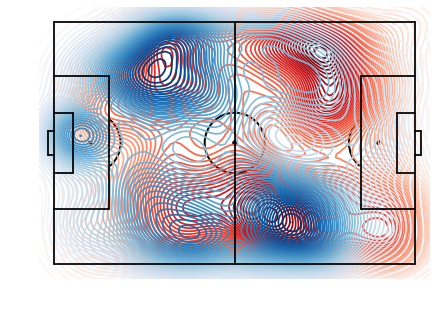

In [38]:
#Create figure
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,80], color="black")
plt.plot([0,120],[80,80], color="black")
plt.plot([120,120],[80,0], color="black")
plt.plot([120,0],[0,0], color="black")
plt.plot([60,60],[0,80], color="black")

#Left Penalty Area
plt.plot([18,18],[62,18],color="black")
plt.plot([0,18],[62,62],color="black")
plt.plot([18,0],[18,18],color="black")

#Right Penalty Area
plt.plot([120,102],[62,62],color="black")
plt.plot([102,102],[62,18],color="black")
plt.plot([102,120],[18,18],color="black")

#Left 6-yard Box
plt.plot([0,6],[50,50],color="black")
plt.plot([6,6],[50,30],color="black")
plt.plot([6,0],[30,30],color="black")

#Right 6-yard Box
plt.plot([120,114],[50,50],color="black")
plt.plot([114,114],[50,30],color="black")
plt.plot([114,120],[30,30],color="black")

# Left Goal
plt.plot([0,-2],[44,44],color="black")
plt.plot([-2,-2],[44,36],color="black")
plt.plot([-2,0],[36,36],color="black")

# Right Goal
plt.plot([120,122],[44,44],color="black")
plt.plot([122,122],[44,36],color="black")
plt.plot([122,120],[36,36],color="black")

#Prepare Circles
centreCircle = plt.Circle((60,40),10,color="black",fill=False, lw=2)
centreSpot = plt.Circle((60,40),0.8,color="black")
leftPenSpot = plt.Circle((12,40),0.8,color="black")
rightPenSpot = plt.Circle((108,40),0.8,color="black")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((12,40),height=20,width=20,angle=0,theta1=310,theta2=50,color="black",lw=2)
rightArc = Arc((108,40),height=20,width=20,angle=0,theta1=130,theta2=230,color="black",lw=2)

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Tidy Axes
plt.axis('off')

#sns.regplot(df_shot["x"],df_shot["y"], fit_reg=False)#, shade=True,n_levels=50)
team1 = df_shot[df_shot.team == 'Chelsea LFC']
team2 = df_shot[df_shot.team != 'Chelsea LFC']

sns.kdeplot(team1["x"], team1["y"], shade=False, shade_lowest=False, n_levels=50, cmap="Reds", ax=ax)
sns.kdeplot(team2["x"], team2["y"], shade=False, shade_lowest=False, n_levels=50, cmap="Blues", ax=ax)
#sns.regplot(team1["x"], team1["y"], fit_reg=False, color="red", ax=ax)
#sns.regplot(team2["x"], team2["y"], fit_reg=False, color="blue", ax=ax)

plt.ylim(-5, 85)
plt.xlim(-5, 125)


#Display Pitch
plt.show()

In [21]:
import requests
import json
import os

In [22]:
f = requests.get('https://raw.githubusercontent.com/statsbomb/' +
                'open-data/master/data/' + 'competitions.json')

In [23]:
json.loads(f.content)

[{'competition_id': 37,
  'competition_name': "FA Women's Super League",
  'country_name': 'England',
  'match_available': '2018-05-25T15:15:55.903434',
  'match_updated': '2018-05-25T15:15:55.903434',
  'season_id': 1,
  'season_name': '2017/2018'},
 {'competition_id': 49,
  'competition_name': 'NWSL',
  'country_name': 'United States of America',
  'match_available': '2018-06-11T15:34:54.124942',
  'match_updated': '2018-06-11T15:34:54.124942',
  'season_id': 3,
  'season_name': '2018'}]

In [24]:
f.text

'[ {\n  "competition_id" : 37,\n  "season_id" : 1,\n  "country_name" : "England",\n  "competition_name" : "FA Women\'s Super League",\n  "season_name" : "2017/2018",\n  "match_updated" : "2018-05-25T15:15:55.903434",\n  "match_available" : "2018-05-25T15:15:55.903434"\n}, {\n  "competition_id" : 49,\n  "season_id" : 3,\n  "country_name" : "United States of America",\n  "competition_name" : "NWSL",\n  "season_name" : "2018",\n  "match_updated" : "2018-06-11T15:34:54.124942",\n  "match_available" : "2018-06-11T15:34:54.124942"\n} ]'

In [200]:
import os
import requests
import json
def get_data(
     source_dir=None, data_dir=None, data_name=None, ext=None
):
    if source_dir is None:
        source_dir = (
            'https://raw.githubusercontent.com/statsbomb/' +
            'open-data/master/data/')
        if data_dir is None:
            pass
        else:
            source_dir = os.path.join(source_dir, data_dir)

        f = requests.get(source_dir + '/' + data_name + ext)
        return json.loads(f.text)

    else:
        if data_dir is None:
            pass
        else:
            source_dir = os.path.join(source_dir, data_dir)
        with open(
                os.path.join(source_dir, data_name + ext), 'r') as f:
            return json.load(f)

In [201]:
get_data(source_dir='..\open-data\data', data_dir=None, data_name='competitions', ext='.json')

[{'competition_id': 37,
  'competition_name': "FA Women's Super League",
  'country_name': 'England',
  'match_available': '2018-05-25T15:15:55.903434',
  'match_updated': '2018-05-25T15:15:55.903434',
  'season_id': 1,
  'season_name': '2017/2018'},
 {'competition_id': 49,
  'competition_name': 'NWSL',
  'country_name': 'United States of America',
  'match_available': '2018-06-11T15:34:54.124942',
  'match_updated': '2018-06-11T15:34:54.124942',
  'season_id': 3,
  'season_name': '2018'}]

In [202]:
get_data(source_dir=None, data_dir=None, data_name='competitions', ext='.json')

[{'competition_id': 37,
  'competition_name': "FA Women's Super League",
  'country_name': 'England',
  'match_available': '2018-05-25T15:15:55.903434',
  'match_updated': '2018-05-25T15:15:55.903434',
  'season_id': 1,
  'season_name': '2017/2018'},
 {'competition_id': 49,
  'competition_name': 'NWSL',
  'country_name': 'United States of America',
  'match_available': '2018-06-11T15:34:54.124942',
  'match_updated': '2018-06-11T15:34:54.124942',
  'season_id': 3,
  'season_name': '2018'}]

In [203]:
get_data(
    source_dir=None,
    data_dir='lineups',
    data_name='7298',
    ext='.json')

[{'lineup': [{'country': {'id': 220, 'name': 'Sweden'},
    'jersey_number': 16,
    'player_id': 4633,
    'player_name': 'Magdalena Ericsson'},
   {'country': {'id': 241, 'name': 'United States of America'},
    'jersey_number': 19,
    'player_id': 4634,
    'player_name': 'Crystal Dunn'},
   {'country': {'id': 171, 'name': 'Norway'},
    'jersey_number': 2,
    'player_id': 4636,
    'player_name': 'Maria Thorisdottir'},
   {'country': {'id': 68, 'name': 'England'},
    'jersey_number': 24,
    'player_id': 4638,
    'player_name': 'Drew Spence'},
   {'country': {'id': 171, 'name': 'Norway'},
    'jersey_number': 18,
    'player_id': 4639,
    'player_name': 'Maren Mjelde'},
   {'country': {'id': 220, 'name': 'Sweden'},
    'jersey_number': 1,
    'player_id': 4640,
    'player_name': 'Rut Hedvig Lindahl'},
   {'country': {'id': 68, 'name': 'England'},
    'jersey_number': 14,
    'player_id': 4641,
    'player_name': 'Francesca Kirby'},
   {'country': {'id': 68, 'name': 'England'}

In [206]:
c.lineups[0]

{'lineup': [{'country': {'id': 220, 'name': 'Sweden'},
   'jersey_number': 16,
   'player_id': 4633,
   'player_name': 'Magdalena Ericsson'},
  {'country': {'id': 241, 'name': 'United States of America'},
   'jersey_number': 19,
   'player_id': 4634,
   'player_name': 'Crystal Dunn'},
  {'country': {'id': 171, 'name': 'Norway'},
   'jersey_number': 2,
   'player_id': 4636,
   'player_name': 'Maria Thorisdottir'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 24,
   'player_id': 4638,
   'player_name': 'Drew Spence'},
  {'country': {'id': 171, 'name': 'Norway'},
   'jersey_number': 18,
   'player_id': 4639,
   'player_name': 'Maren Mjelde'},
  {'country': {'id': 220, 'name': 'Sweden'},
   'jersey_number': 1,
   'player_id': 4640,
   'player_name': 'Rut Hedvig Lindahl'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 14,
   'player_id': 4641,
   'player_name': 'Francesca Kirby'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 4,
   '

In [207]:
c.get_lineups()

https://raw.githubusercontent.com/statsbomb/open-data/master/data/lineups
https://raw.githubusercontent.com/statsbomb/open-data/master/data/lineups
https://raw.githubusercontent.com/statsbomb/open-data/master/data/lineups
https://raw.githubusercontent.com/statsbomb/open-data/master/data/lineups
https://raw.githubusercontent.com/statsbomb/open-data/master/data/lineups
https://raw.githubusercontent.com/statsbomb/open-data/master/data/lineups
https://raw.githubusercontent.com/statsbomb/open-data/master/data/lineups
https://raw.githubusercontent.com/statsbomb/open-data/master/data/lineups
https://raw.githubusercontent.com/statsbomb/open-data/master/data/lineups
https://raw.githubusercontent.com/statsbomb/open-data/master/data/lineups
https://raw.githubusercontent.com/statsbomb/open-data/master/data/lineups


In [208]:
c.lineups[0]

{'lineup': [{'country': {'id': 220, 'name': 'Sweden'},
   'jersey_number': 16,
   'player_id': 4633,
   'player_name': 'Magdalena Ericsson'},
  {'country': {'id': 241, 'name': 'United States of America'},
   'jersey_number': 19,
   'player_id': 4634,
   'player_name': 'Crystal Dunn'},
  {'country': {'id': 171, 'name': 'Norway'},
   'jersey_number': 2,
   'player_id': 4636,
   'player_name': 'Maria Thorisdottir'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 24,
   'player_id': 4638,
   'player_name': 'Drew Spence'},
  {'country': {'id': 171, 'name': 'Norway'},
   'jersey_number': 18,
   'player_id': 4639,
   'player_name': 'Maren Mjelde'},
  {'country': {'id': 220, 'name': 'Sweden'},
   'jersey_number': 1,
   'player_id': 4640,
   'player_name': 'Rut Hedvig Lindahl'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 14,
   'player_id': 4641,
   'player_name': 'Francesca Kirby'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 4,
   '

In [209]:
b = [ {
  "team_id" : 745,
  "team_name" : "Chelsea LFC",
  "lineup" : [ {
    "player_id" : 4633,
    "player_name" : "Magdalena Ericsson",
    "jersey_number" : 16,
    "country" : {
      "id" : 220,
      "name" : "Sweden"
    }
  }, {
    "player_id" : 4634,
    "player_name" : "Crystal Dunn",
    "jersey_number" : 19,
    "country" : {
      "id" : 241,
      "name" : "United States of America"
    }
  }, {
    "player_id" : 4636,
    "player_name" : "Maria Thorisdottir",
    "jersey_number" : 2,
    "country" : {
      "id" : 171,
      "name" : "Norway"
    }
  }, {
    "player_id" : 4638,
    "player_name" : "Drew Spence",
    "jersey_number" : 24,
    "country" : {
      "id" : 68,
      "name" : "England"
    }
  }, {
    "player_id" : 4639,
    "player_name" : "Maren Mjelde",
    "jersey_number" : 18,
    "country" : {
      "id" : 171,
      "name" : "Norway"
    }
  }, {
    "player_id" : 4640,
    "player_name" : "Rut Hedvig Lindahl",
    "jersey_number" : 1,
    "country" : {
      "id" : 220,
      "name" : "Sweden"
    }
  }, {
    "player_id" : 4641,
    "player_name" : "Francesca Kirby",
    "jersey_number" : 14,
    "country" : {
      "id" : 68,
      "name" : "England"
    }
  }, {
    "player_id" : 4642,
    "player_name" : "Millie Bright",
    "jersey_number" : 4,
    "country" : {
      "id" : 68,
      "name" : "England"
    }
  }, {
    "player_id" : 4647,
    "player_name" : "So-yun Ji",
    "jersey_number" : 10,
    "country" : {
      "id" : 121,
      "name" : "Korea (South)"
    }
  }, {
    "player_id" : 4652,
    "player_name" : "Eniola Aluko",
    "jersey_number" : 9,
    "country" : {
      "id" : 166,
      "name" : "Nigeria"
    }
  }, {
    "player_id" : 4656,
    "player_name" : "Hannah Jayne Blundell",
    "jersey_number" : 3,
    "country" : {
      "id" : 68,
      "name" : "England"
    }
  }, {
    "player_id" : 4657,
    "player_name" : "Anita Amma Ankyewah Asante",
    "jersey_number" : 6,
    "country" : {
      "id" : 68,
      "name" : "England"
    }
  }, {
    "player_id" : 4659,
    "player_name" : "Ramona Bachmann",
    "jersey_number" : 23,
    "country" : {
      "id" : 221,
      "name" : "Switzerland"
    }
  }, {
    "player_id" : 4660,
    "player_name" : "Erin Cuthbert",
    "jersey_number" : 22,
    "country" : {
      "id" : 201,
      "name" : "Scotland"
    }
  } ]
}, {
  "team_id" : 746,
  "team_name" : "Manchester City WFC",
  "lineup" : [ {
    "player_id" : 4635,
    "player_name" : "Julia Spetsmark",
    "jersey_number" : 15,
    "country" : {
      "id" : 220,
      "name" : "Sweden"
    }
  }, {
    "player_id" : 4637,
    "player_name" : "Ellie Roebuck",
    "jersey_number" : 26,
    "country" : {
      "id" : 68,
      "name" : "England"
    }
  }, {
    "player_id" : 4643,
    "player_name" : "Georgia Stanway",
    "jersey_number" : 12,
    "country" : {
      "id" : 68,
      "name" : "England"
    }
  }, {
    "player_id" : 4644,
    "player_name" : "Jill Scott",
    "jersey_number" : 8,
    "country" : {
      "id" : 68,
      "name" : "England"
    }
  }, {
    "player_id" : 4645,
    "player_name" : "Isobel Christiansen",
    "jersey_number" : 11,
    "country" : {
      "id" : 68,
      "name" : "England"
    }
  }, {
    "player_id" : 4646,
    "player_name" : "Claire Emslie",
    "jersey_number" : 22,
    "country" : {
      "id" : 201,
      "name" : "Scotland"
    }
  }, {
    "player_id" : 4648,
    "player_name" : "Abbie McManus",
    "jersey_number" : 23,
    "country" : {
      "id" : 68,
      "name" : "England"
    }
  }, {
    "player_id" : 4649,
    "player_name" : "Esme Beth Morgan",
    "jersey_number" : 14,
    "country" : {
      "id" : 68,
      "name" : "England"
    }
  }, {
    "player_id" : 4650,
    "player_name" : "Nadia Nadim",
    "jersey_number" : 10,
    "country" : {
      "id" : 61,
      "name" : "Denmark"
    }
  }, {
    "player_id" : 4651,
    "player_name" : "Demi Stokes",
    "jersey_number" : 3,
    "country" : {
      "id" : 68,
      "name" : "England"
    }
  }, {
    "player_id" : 4653,
    "player_name" : "Jane Ross",
    "jersey_number" : 16,
    "country" : {
      "id" : 201,
      "name" : "Scotland"
    }
  }, {
    "player_id" : 4654,
    "player_name" : "Nikita Parris",
    "jersey_number" : 17,
    "country" : {
      "id" : 68,
      "name" : "England"
    }
  }, {
    "player_id" : 4655,
    "player_name" : "Jennifer Beattie",
    "jersey_number" : 5,
    "country" : {
      "id" : 201,
      "name" : "Scotland"
    }
  }, {
    "player_id" : 4658,
    "player_name" : "Keira Walsh",
    "jersey_number" : 24,
    "country" : {
      "id" : 68,
      "name" : "England"
    }
  } ]
} ]

In [214]:
b[0]['match_id'] = 1